## The Exercise

This exercise is simple: build and train a CNN using Keras that achieves at least 92% validation accuracy on the Fashion MNIST. While simple in description, this is challenging in practice. In your endeavor to achieve this result, apply the scientific method and iteratively improve your models. Start by forming a hypothesis about network architecture, specifically:

* How many convolutional layers should I use?
  * Should I use striding?
  * Should I use pooling?
  * How many filters should I use at each layer?
  * Which activation function should I use on these layers?
* How many Dense layers should I use in the classification section?
  * How many nodes per layer should I start with?
  * Where should I apply dropout layers, and what percent dropout should I use in those layers?
  * Which activation function should I use on these layers?
* Which loss function should I use?
* Which optimizer should I use?
* Should I enable early stopping?
  * What parameters should I use related to early stopping?

Once you've made these decisions, write the code to build and train the model. Once you've trained the model and seen its validation scores, make a change to some aspect of your network (seriously consider making just one change at a time), and re-evaluate. With each change, make a note of the change and document how that change impacted performance—being explicit and documenting these impacts is not just a good scientific practice, it will help you learn and build an intuition for how changes might impact results.

Be careful not to over-generalize your findings, though. There are complex interactions between datasets, network architectures, different optimizers, and so on. What is true in one situation might be a generalizable truth, but it might be specific to the current situation as well.

* How many convolutional layers should I use?
  * Should I use striding?
  * Should I use pooling?
  * How many filters should I use at each layer?
  * Which activation function should I use on these layers?
* How many Dense layers should I use in the classification section?
  * How many nodes per layer should I start with?
  * Where should I apply dropout layers, and what percent dropout should I use in those layers?
  * Which activation function should I use on these layers?
* Which loss function should I use?
* Which optimizer should I use?
* Should I enable early stopping?
  * What parameters should I use related to early stopping?

In [2]:
#Fashion MNEST is used here - black and white images to identify types of clothing

# Setting up MNST, this should look familiar:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784


#Training Images
#Training Data
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [3]:

#What does reshape do? 
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [4]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [5]:
i = 0 # So we can look at one at a time...

# So we can see the label
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

tf.keras.layers.Conv2D(

    filters, -What is a filter? Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    
    kernel_size, - Kernal size is the NxM applied to each filter
    
    strides=(1, 1), An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
    
    padding="valid" vs "same", What is difference?
    data_format=None,
    dilation_rate=(1, 1), #No dialation 0,0
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

* How many convolutional layers should I use?
  * Should I use striding? Yes, but I don't think we have a choice
  * Should I use pooling? I am not using any 
  * How many filters should I use at each layer? very minimal - 1-2 per two layers ( I want to see what filters do)
  * Which activation function should I use on these layers? relu
  
* How many Dense layers should I use in the classification section?
  I'm not going to use any - other thant he softmax one at the end
  
* Which loss function should I use? None
* Which optimizer should I use? None
* Should I enable early stopping? No

--

I wanted to see what Convuluted algorithms did on their own - with as minimal amount of frames as possible, I didn't quite understand the point of a frame on the initial steps so I wanted to see what would happen.

I expected it to be extremely bad

In [7]:
#Creating a Convulated Neural Network Process
model = Sequential()

#Dialated Convolution: Instead of focusing on 3x3 you can shift the analyzed
#Frames by some x or y value. Reducing the size of the 'pyramid'

# add model layers. The first parameter is the number of filters to make at each layer.
# Meaning here the result of the first layer is 64 different "feature maps" or "activation maps"

#When using this layer as the first layer in a model, 
#provide the keyword argument input_shape (tuple of 
#integers, does not include the sample axis), 

#e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures 
#in data_format="channels_last".

# Note, fewer filters and a bigger kernel, plus a pooling layer
#28,28
model.add(Conv2D(1, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#14, 14
# Note, more filters and a pooling
model.add(Conv2D(2, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 15,720
Trainable params: 15,720
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 55s 1ms/sample - loss: 2.3932 - accuracy: 0.7231 - val_loss: 0.8257 - val_accuracy: 0.7838
Epoch 2/5
54000/54000 [==============================] - 52s 962us/sample - loss: 0.6013 - accuracy: 0.8153 - val_loss: 0.5951 - val_accuracy: 0.8098
Epoch 3/5
54000/54000 [==============================] - 53s 975us/sample - loss: 0.4742 - accuracy: 0.8396 - val_loss: 0.5312 - val_accuracy: 0.8257
Epoch 4/5
54000/54000 [==============================] - 52s 958us/sample - loss: 0.4227 - accuracy: 0.8525 - val_loss: 0.5033 - val_accuracy: 0.8365
Epoch 5/5
54000/54000 [==============================] - 55s 1ms/sample - loss: 0.3935 - accuracy: 0.8605 - val_loss: 0.4866 - val_accuracy: 0.8388


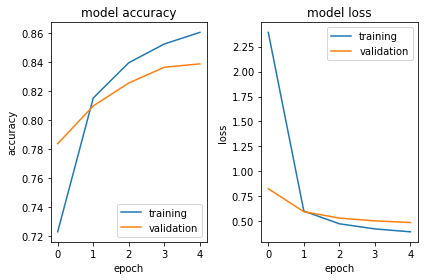

Test loss: 0.495
Test accuracy: 0.836


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 54s 997us/sample - loss: 0.4066 - accuracy: 0.8555 - val_loss: 0.4546 - val_accuracy: 0.8453
Epoch 2/20
54000/54000 [==============================] - 52s 971us/sample - loss: 0.3639 - accuracy: 0.8684 - val_loss: 0.4478 - val_accuracy: 0.8470
Epoch 3/20
54000/54000 [==============================] - 51s 948us/sample - loss: 0.3444 - accuracy: 0.8751 - val_loss: 0.4442 - val_accuracy: 0.8517
Epoch 4/20
54000/54000 [==============================] - 51s 936us/sample - loss: 0.3286 - accuracy: 0.8807 - val_loss: 0.4411 - val_accuracy: 0.8518
Epoch 5/20
54000/54000 [==============================] - 51s 952us/sample - loss: 0.3188 - accuracy: 0.8836 - val_loss: 0.4349 - val_accuracy: 0.8545
Epoch 6/20
54000/54000 [==============================] - 52s 956us/sample - loss: 0.3104 - accuracy: 0.8862 - val_loss: 0.4442 - val_accuracy: 0.8547
Epoch 7/20
54000/54000 [=====================

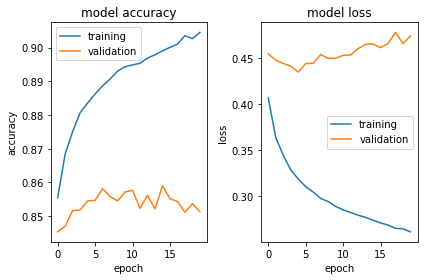

Test loss: 0.488
Test accuracy: 0.852


In [10]:
#The accuracy here suprised me; its off - but it atleast displayed a trend that it waas learning
#- For my next approach I would do the same but add more Epochs

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=20, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

In [14]:
#Increase made no major difference, and it seemed like validation accuracy never really improved.
#This time I added the dropout functionality to see how tight it would become
#Also dropped the Epoch down to 10

model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
#28,28
model.add(Conv2D(1, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#14, 14
# Note, more filters and a pooling
model.add(Conv2D(2, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15690     
Total params: 15,720
Trainable params: 15,720
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 59s 1ms/sample - loss: 1.1942 - accuracy: 0.6800 - val_loss: 0.6585 - val_accuracy: 0.7670
Epoch 2/10
54000/54000 [==============================] - 56s 1ms/sample - loss: 0.6285 - accuracy: 0.7794 - val_loss: 0.5597 - val_accuracy: 0.8050
Epoch 3/10
54000/54000 [==============================] - 56s 1ms/sample - loss: 0.5360 - accuracy: 0.8099 - val_loss: 0.5192 - val_accuracy: 0.8203
Epoch 4/10
54000/54000 [==============================] - 56s 1ms/sample - loss: 0.4711 - accuracy: 0.8305 - val_loss: 0.4825 - val_accuracy: 0.8312
Epoch 5/10
54000/54000 [==============================] - 60s 1ms/sample - loss: 0.4314 - accuracy: 0.8442 - val_loss: 0.4621 - val_accuracy: 0.8388
Epoch 6/10
54000/54000 [==============================] - 55s 1ms/sample - loss: 0.4090 - accuracy: 0.8499 - val_loss: 0.4447 - val_accuracy: 0.8413
Epoch 7/10
54000/54000 [==============================] -

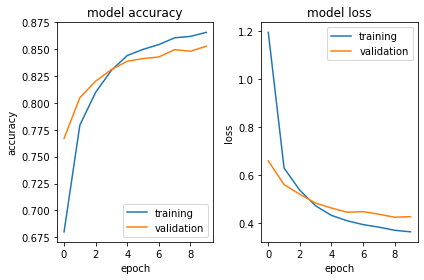

Test loss: 0.445
Test accuracy: 0.847


In [15]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

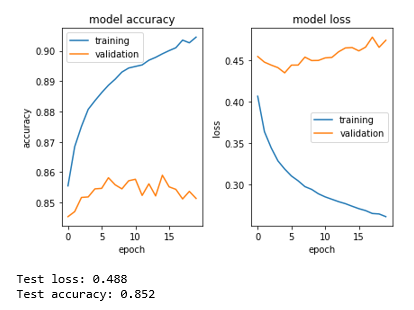

-- Comparing the firest run that we did; I don't see any real difference in comparison... Validation is way tighter in comparison. Which is something to take note of.
 

In [16]:
#This time I am going to change the way the 1st and 2nd layer works... 
#going to add more layers Adding 9 more in first layer
#Adding 100 to other layer.

model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
#28,28
model.add(Conv2D(1, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#14, 14
# Note, more filters and a pooling
model.add(Conv2D(100, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 100)       1000      
_________________________________________________________________
flatten_4 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 78400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                784010    
Total params: 785,020
Trainable params: 785,020
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 397s 7ms/sample - loss: 9.8895 - accuracy: 0.8168 - val_loss: 0.4730 - val_accuracy: 0.8683
Epoch 2/10
54000/54000 [==============================] - 340s 6ms/sample - loss: 0.3612 - accuracy: 0.8870 - val_loss: 0.4473 - val_accuracy: 0.8693
Epoch 3/10
54000/54000 [==============================] - 376s 7ms/sample - loss: 0.2789 - accuracy: 0.9037 - val_loss: 0.3985 - val_accuracy: 0.8780
Epoch 4/10
54000/54000 [==============================] - 335s 6ms/sample - loss: 0.2326 - accuracy: 0.9183 - val_loss: 0.4198 - val_accuracy: 0.8798
Epoch 5/10
54000/54000 [==============================] - 334s 6ms/sample - loss: 0.2120 - accuracy: 0.9246 - val_loss: 0.4127 - val_accuracy: 0.8823
Epoch 6/10
54000/54000 [==============================] - 331s 6ms/sample - loss: 0.1913 - accuracy: 0.9315 - val_loss: 0.4091 - val_accuracy: 0.8873
Epoch 7/10
54000/54000 [===========================

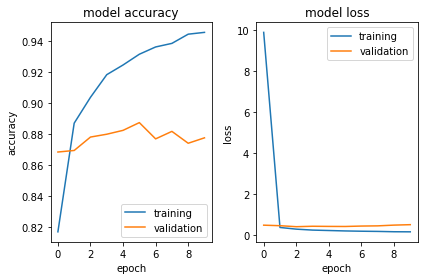

Test loss: 0.495
Test accuracy: 0.876


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

We were able to get closer to the 94 percent certainty with training data with larger numbers, but his did not assist with Validation accuracy at all. And I believe the goal of this is to get it within 93 percent accuracy for both.

--

this time we are going tto make the Conviluded Layers 10 and 50 (isntead of 1,100)
- Add a layer of Pooling of 2,2
see what this brings us up to.



In [18]:
#This time I am going to change the way the 1st and 2nd layer works... 
#going to add more layers Adding 9 more in first layer
#Adding 100 to other layer.

model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
#28,28
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#14, 14
# Note, more filters and a pooling
model.add(Conv2D(50, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 50)        4550      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 9800)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                98010     
Total params: 102,660
Trainable params: 102,660
Non-trainable params: 0
________________________________________________

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 218s 4ms/sample - loss: 1.2128 - accuracy: 0.8284 - val_loss: 0.3389 - val_accuracy: 0.8827
Epoch 2/10
54000/54000 [==============================] - 217s 4ms/sample - loss: 0.3011 - accuracy: 0.8930 - val_loss: 0.2976 - val_accuracy: 0.8918
Epoch 3/10
54000/54000 [==============================] - 214s 4ms/sample - loss: 0.2545 - accuracy: 0.9080 - val_loss: 0.2984 - val_accuracy: 0.8935
Epoch 4/10
54000/54000 [==============================] - 214s 4ms/sample - loss: 0.2270 - accuracy: 0.9180 - val_loss: 0.2867 - val_accuracy: 0.8937
Epoch 5/10
54000/54000 [==============================] - 215s 4ms/sample - loss: 0.2100 - accuracy: 0.9235 - val_loss: 0.2988 - val_accuracy: 0.9005
Epoch 6/10
54000/54000 [==============================] - 223s 4ms/sample - loss: 0.1905 - accuracy: 0.9309 - val_loss: 0.2953 - val_accuracy: 0.9027
Epoch 7/10
54000/54000 [===========================

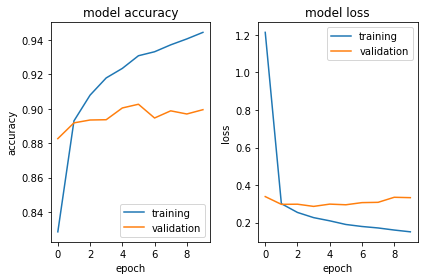

Test loss: 0.355
Test accuracy: 0.9


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Accuracy has increased as well as model Accuracy 

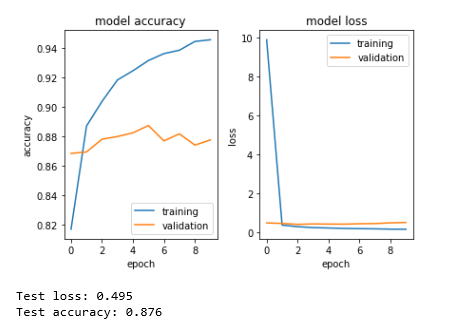

- Comparing: the only difference is that the loss was extremely low so it ended up finding the peak 'lesson' 

For the next run; I'm going to add two Maxpooling layers and then see what imrovement comes out of this. Also adding 5 more epochs.


In [21]:
model = Sequential()
 
#28,28
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#14, 14
# Note, more filters and a pooling
model.add(Conv2D(50, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 50)        4550      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2450)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 93s 2ms/sample - loss: 0.8746 - accuracy: 0.7961 - val_loss: 0.3821 - val_accuracy: 0.8652
Epoch 2/15
54000/54000 [==============================] - 90s 2ms/sample - loss: 0.3547 - accuracy: 0.8728 - val_loss: 0.3285 - val_accuracy: 0.8870
Epoch 3/15
54000/54000 [==============================] - 91s 2ms/sample - loss: 0.2987 - accuracy: 0.8930 - val_loss: 0.3018 - val_accuracy: 0.8927
Epoch 4/15
54000/54000 [==============================] - 91s 2ms/sample - loss: 0.2699 - accuracy: 0.9031 - val_loss: 0.2913 - val_accuracy: 0.9017
Epoch 5/15
54000/54000 [==============================] - 91s 2ms/sample - loss: 0.2511 - accuracy: 0.9086 - val_loss: 0.3023 - val_accuracy: 0.8962
Epoch 6/15
54000/54000 [==============================] - 91s 2ms/sample - loss: 0.2349 - accuracy: 0.9156 - val_loss: 0.2909 - val_accuracy: 0.9000
Epoch 7/15
54000/54000 [==============================] -

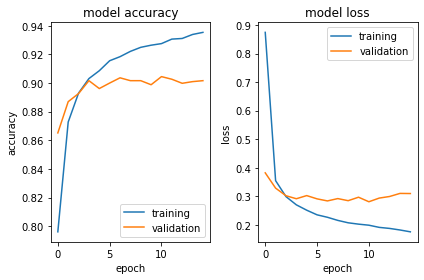

Test loss: 0.315
Test accuracy: 0.903


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=15, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

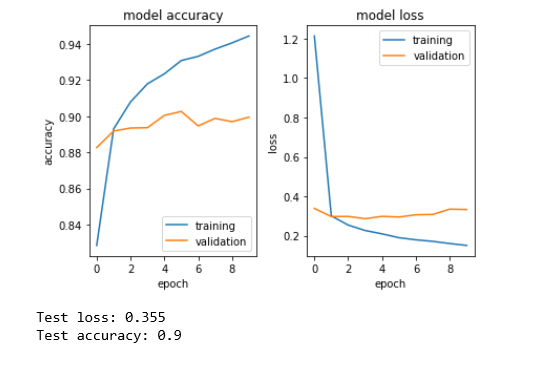

- Little increase Training data is getting more accurate with more Epochs, otherwise I cant seem to get validation tight enough to 93 - going to add the Normal Neural Network at about 256 in size as an additiona layer

In [23]:
model = Sequential()
 
#28,28
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#14, 14
# Note, more filters and a pooling
model.add(Conv2D(50, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 50)        4550      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               627456    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 139s 3ms/sample - loss: 1.1750 - accuracy: 0.8166 - val_loss: 0.3375 - val_accuracy: 0.8747
Epoch 2/15
54000/54000 [==============================] - 131s 2ms/sample - loss: 0.3127 - accuracy: 0.8866 - val_loss: 0.2938 - val_accuracy: 0.8873
Epoch 3/15
54000/54000 [==============================] - 126s 2ms/sample - loss: 0.2600 - accuracy: 0.9040 - val_loss: 0.2845 - val_accuracy: 0.8948
Epoch 4/15
54000/54000 [==============================] - 130s 2ms/sample - loss: 0.2286 - accuracy: 0.9154 - val_loss: 0.2621 - val_accuracy: 0.9005
Epoch 5/15
54000/54000 [==============================] - 128s 2ms/sample - loss: 0.1998 - accuracy: 0.9253 - val_loss: 0.2681 - val_accuracy: 0.9028
Epoch 6/15
54000/54000 [==============================] - 128s 2ms/sample - loss: 0.1802 - accuracy: 0.9317 - val_loss: 0.2680 - val_accuracy: 0.9083
Epoch 7/15
54000/54000 [===========================

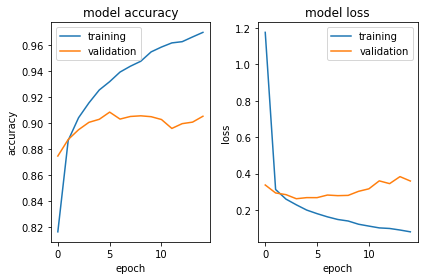

Test loss: 0.402
Test accuracy: 0.9


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=15, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

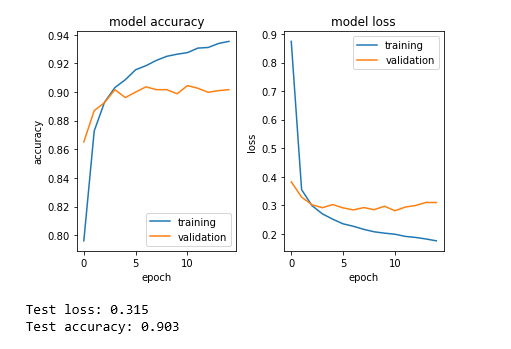

